# Clustering Analysis 

# Understanding and Implementing K-Means, Hierarchical, and DBSCAN Algorithms.



# Objective:

The objective of this assignment is to introduce to various clustering algorithms, including K-Means, hierarchical, and DBSCAN, and provide hands-on experience in applying these techniques to a real-world dataset.


# Data Preprocessing:

Preprocess the dataset to handle missing values, remove outliers, and scale the features if necessary.

Perform exploratory data analysis (EDA) to gain insights into the distribution of data and identify potential clusters.

Use multiple visualizations to understand the hidden patterns in the dataset


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples


In [2]:
import warnings

# Ignore all future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# loading the Dataset
file_path = r'C:\Users\amerk\assignment folder\EastWestAirlines.xlsx'  
df = pd.read_excel(file_path, sheet_name=1)
df

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  
0          0  
1          0  
2          0  
3          0  
4          1  
...      ...  
3994       1  
3995       1  
3996       1  
3997       0  
3998       0  

[3999 rows x 12 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


1) Handle Missing Values

In [5]:
# Check for missing values
print(df.isnull().sum())


ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64


2) Remove Outliers

In [6]:
# Calculate IQR for each feature and remove outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1


# Filter out the outliers
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [8]:
# Rename columns
df.rename(columns={'ID#': 'ID', 'Award?': 'Award'}, inplace=True)

# Display the first few rows of the dataset
df.head()

C:\Users\amerk\AppData\Local\Temp\ipykernel_3424\1971628038.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'ID#': 'ID', 'Award?': 'Award'}, inplace=True)


ID  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0   1    28143           0          1          1          1          174   
1   2    19244           0          1          1          1          215   
2   3    41354           0          1          1          1         4123   
3   4    14776           0          1          1          1          500   
5   6    16420           0          1          1          1            0   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award  
0            1                  0                0               7000      0  
1            2                  0                0               6968      0  
2            4                  0                0               7034      0  
3            1                  0                0               6952      0  
5            0                  0                0               6942      0

3) Scale the Features

In [9]:

# Initialize the scaler
scaler = StandardScaler()

# Scale the features (excluding 'ID#' and 'Award?')
scaled_features = scaler.fit_transform(df.drop(['ID', 'Award'], axis=1))

# Convert scaled features back to a DataFrame
scaled_data = pd.DataFrame(scaled_features, columns=df.columns[1:-1])

# Add the 'ID#' and 'Award?' columns back to the DataFrame
scaled_data['ID'] = df['ID'].values
scaled_data['Award'] = df['Award'].values

# Display the first few rows of the scaled data
print(scaled_data.head())

    Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0 -0.438859         0.0  -0.719055        0.0        0.0    -0.783131   
1 -0.647735         0.0  -0.719055        0.0        0.0    -0.780130   
2 -0.128773         0.0  -0.719055        0.0        0.0    -0.494075   
3 -0.752607         0.0  -0.719055        0.0        0.0    -0.759268   
4 -0.714019         0.0  -0.719055        0.0        0.0    -0.795867   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  ID  \
0    -1.081732          -0.378837        -0.409708           1.503693   1   
1    -0.952735          -0.378837        -0.409708           1.488035   2   
2    -0.694742          -0.378837        -0.409708           1.520330   3   
3    -1.081732          -0.378837        -0.409708           1.480206   4   
4    -1.210728          -0.378837        -0.409708           1.475312   6   

   Award  
0      0  
1      0  
2      0  
3      0  
4      0  


# Exploratory Data Analysis (EDA)

In [10]:
# Summary statistics
scaled_data.describe()

Balance  Qual_miles     cc1_miles  cc2_miles  cc3_miles  \
count  2.875000e+03      2875.0  2.875000e+03     2875.0     2875.0   
mean  -7.908650e-17         0.0 -7.908650e-17        0.0        0.0   
std    1.000174e+00         0.0  1.000174e+00        0.0        0.0   
min   -1.098253e+00         0.0 -7.190547e-01        0.0        0.0   
25%   -7.408945e-01         0.0 -7.190547e-01        0.0        0.0   
50%   -3.171815e-01         0.0 -7.190547e-01        0.0        0.0   
75%    4.492551e-01         0.0  1.013789e+00        0.0        0.0   
max    3.656806e+00         0.0  2.746632e+00        0.0        0.0   

        Bonus_miles   Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
count  2.875000e+03  2.875000e+03       2.875000e+03     2.875000e+03   
mean  -5.931487e-17  8.402940e-17       1.482872e-17     2.965744e-17   
std    1.000174e+00  1.000174e+00       1.000174e+00     1.000174e+00   
min   -7.958670e-01 -1.210728e+00      -3.788372e-01    -4.097077e-01   
25%   -7.592685e-01 -9.527351e-01      -3.788372e-01    -4.097077e-01   
50%   -4.664800e-01 -4.975903e-02      -3.788372e-01    -4.097077e-01   
75%    4.549983e-01  7.242205e-01      -3.788372e-01    -4.097077e-01   
max    3.404329e+00  3.691142e+00       4.711239e+00     3.716071e+00   

       Days_since_enroll           ID        Award  
count       2.875000e+03  2875.000000  2875.000000  
mean       -7.908650e-17  2113.814609     0.279652  
std         1.000174e+00  1151.821810     0.448906  
min        -1.917616e+00     1.000000     0.000000  
25%        -8.672958e-01  1131.500000     0.000000  
50%        -5.967701e-02  2167.000000     0.000000  
75%         8.020114e-01  3101.500000     1.000000  
max         2.137849e+00  4021.000000     1.000000

# Visualizations

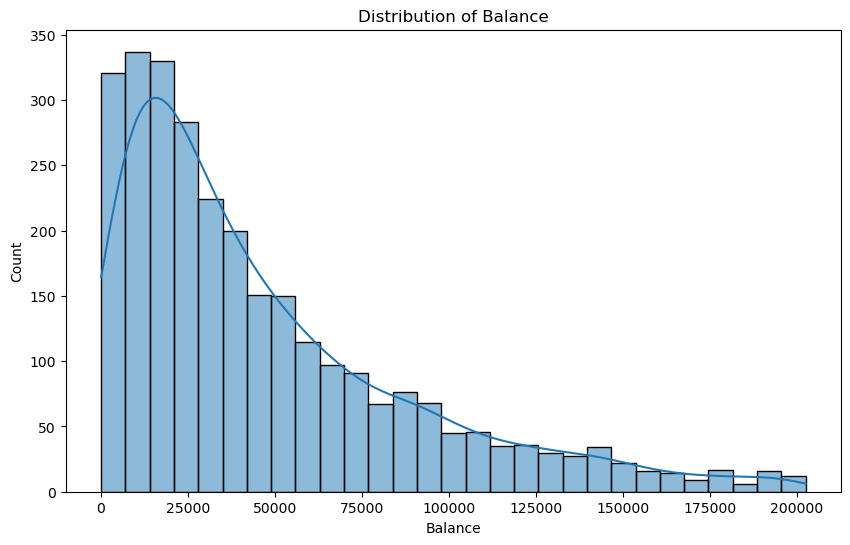

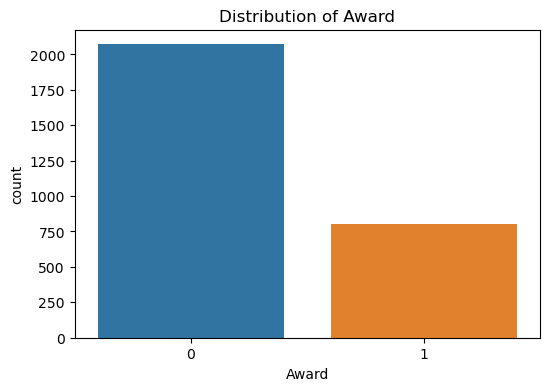

In [11]:
# Distribution of the 'Balance' feature
plt.figure(figsize=(10, 6))
sns.histplot(df['Balance'], kde=True)
plt.title('Distribution of Balance')
plt.show()



# Distribution of the target variable 'Award?'
plt.figure(figsize=(6, 4))
sns.countplot(x='Award', data=scaled_data)
plt.title('Distribution of Award')
plt.show()


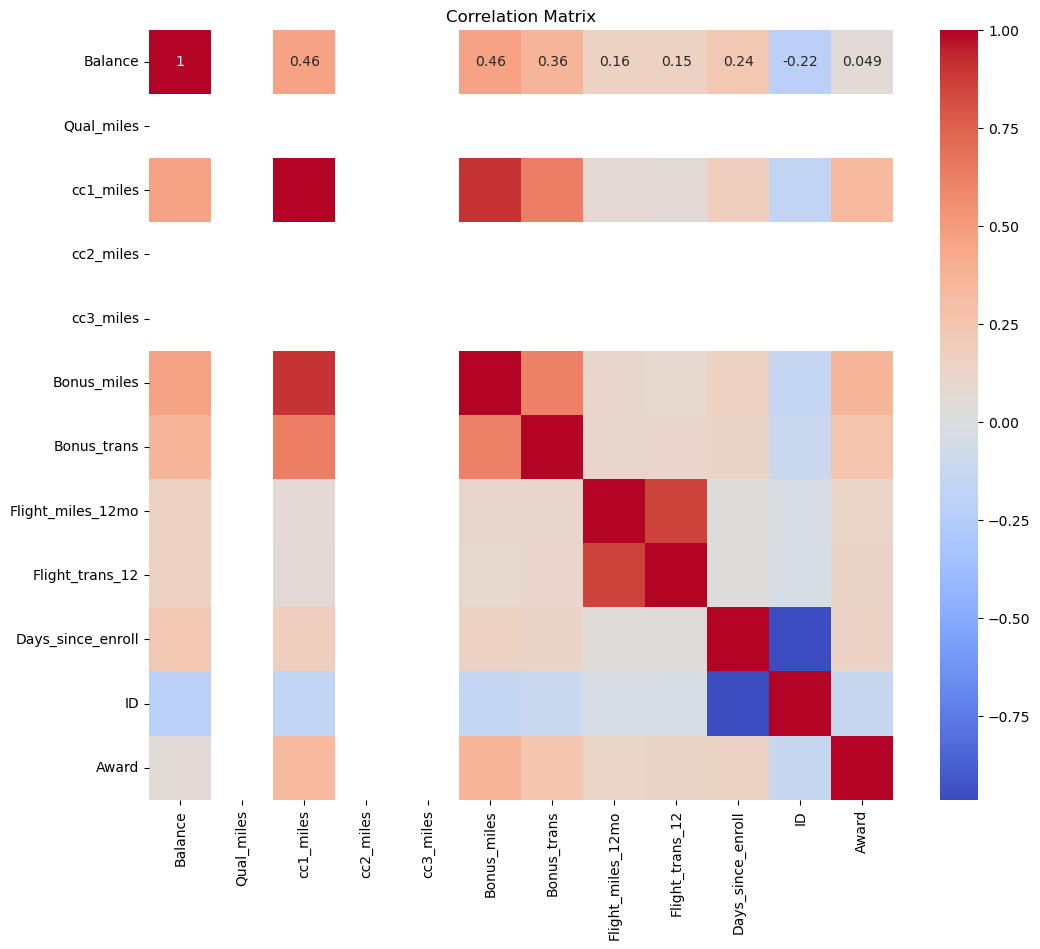

In [12]:

# Correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = scaled_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

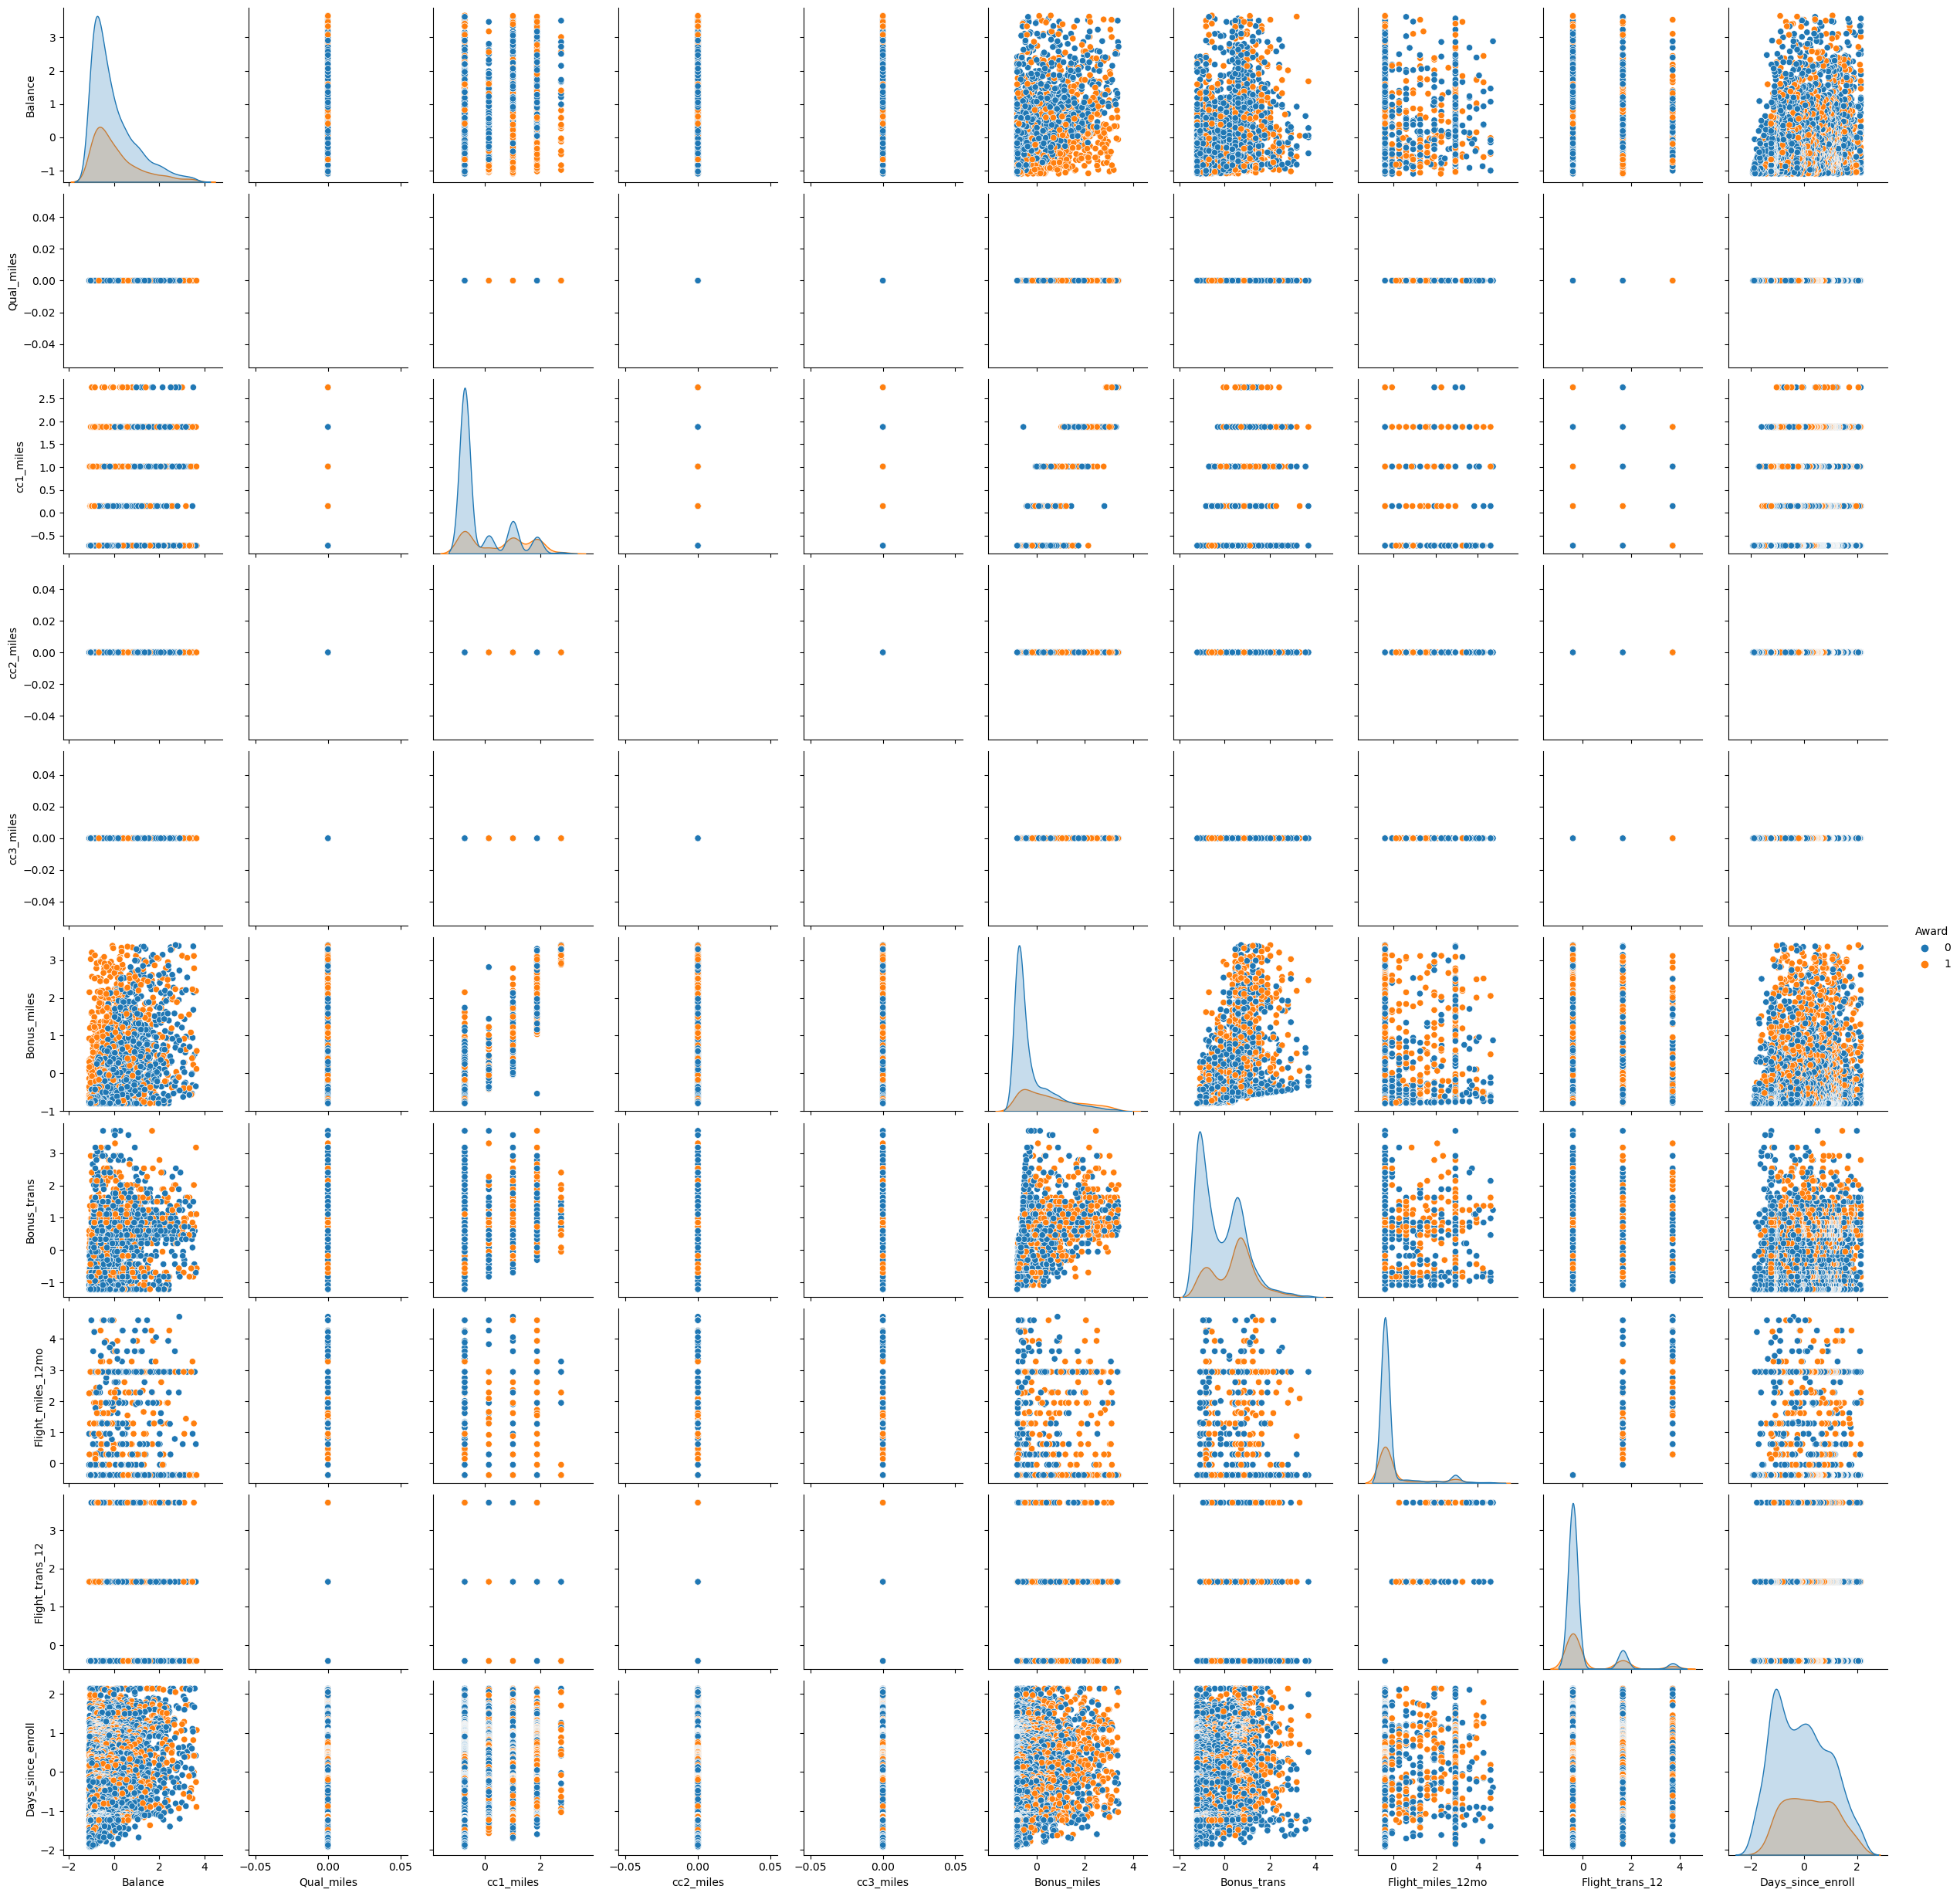

In [13]:
# Pairplot to identify clusters
sns.pairplot(scaled_data.drop(['ID'], axis=1), hue='Award', diag_kind='kde')
plt.show()

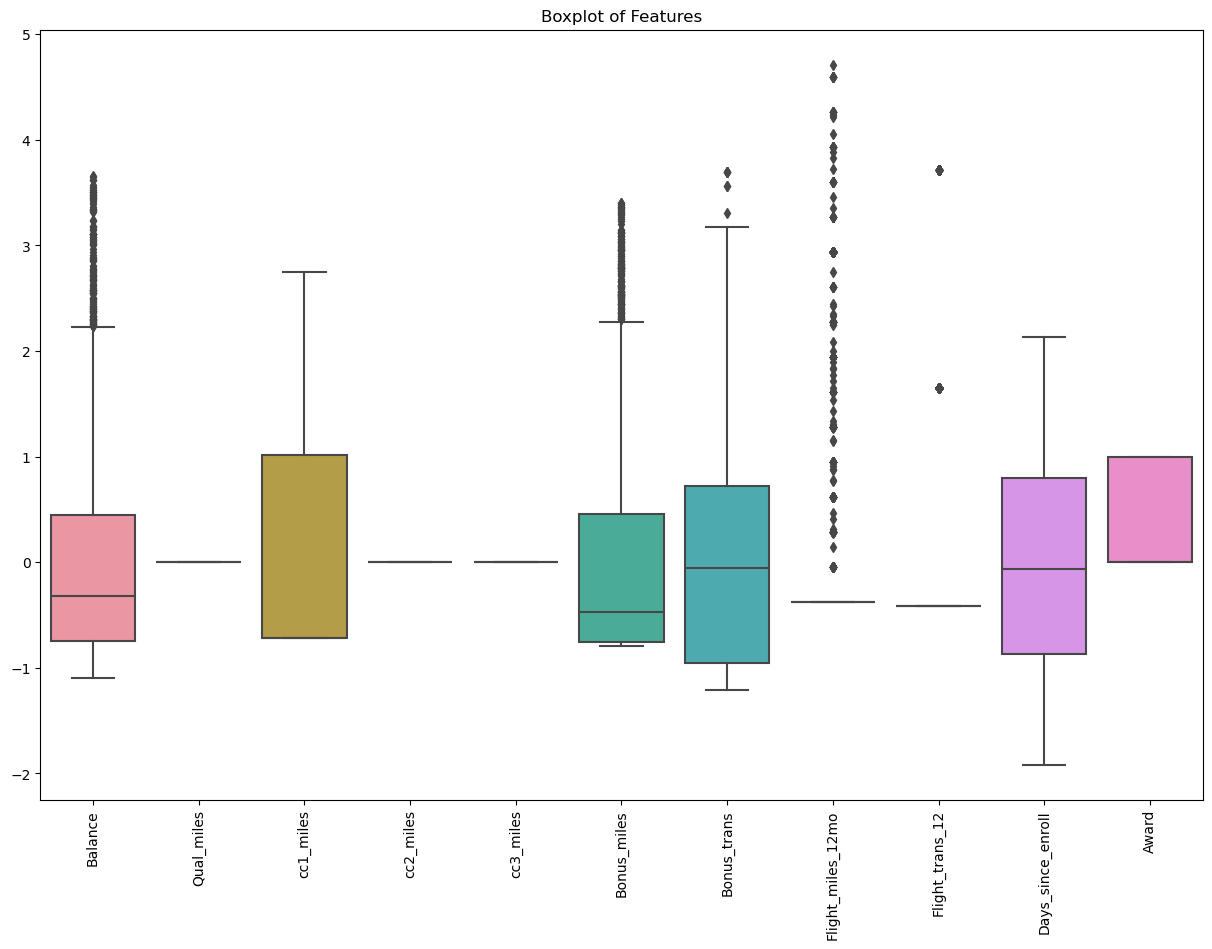

In [14]:
# Boxplot to see outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=scaled_data.drop(['ID'], axis=1))
plt.xticks(rotation=90)
plt.title('Boxplot of Features')
plt.show()

# Implementing Clustering Algorithms:


Implement the K-Means, hierarchical, and DBSCAN algorithms using a programming language such as Python with libraries like scikit-learn or MATLAB

# K-Means Clustering

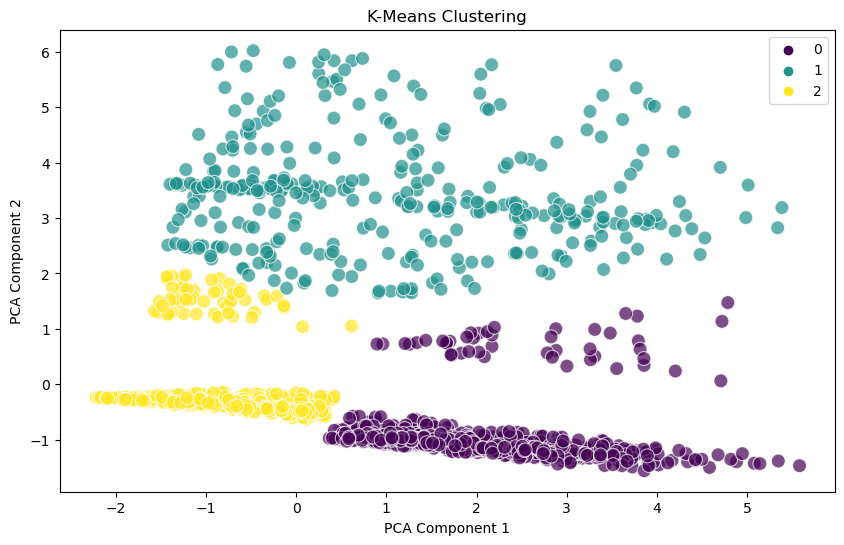

In [16]:
# Remove the 'ID' and 'Award' columns for clustering
X = scaled_data.drop(['ID', 'Award'], axis=1)

# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# Add K-Means cluster labels to the DataFrame
scaled_data['KMeans_Cluster'] = kmeans_labels

# Visualize the clusters using PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], hue=kmeans_labels, palette='viridis', s=100, alpha=0.7)
plt.title('K-Means Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# Hierarchical Clustering

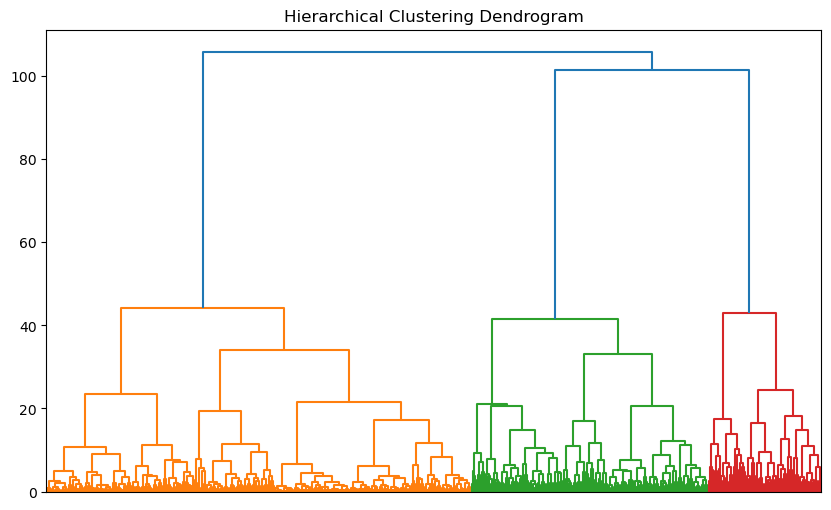

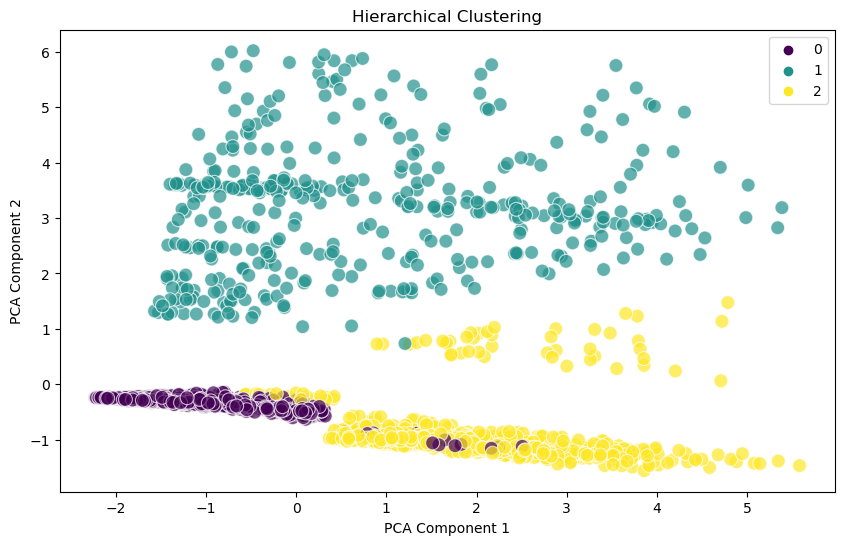

In [17]:
# Apply Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(X)

# Add Hierarchical cluster labels to the DataFrame
scaled_data['Hierarchical_Cluster'] = hierarchical_labels

# Visualize the dendrogram
linked = linkage(X, 'ward')
plt.figure(figsize=(10, 6))
dendrogram(linked, orientation='top', no_labels=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

# Visualize the clusters using PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], hue=hierarchical_labels, palette='viridis', s=100, alpha=0.7)
plt.title('Hierarchical Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# DBSCAN Clustering

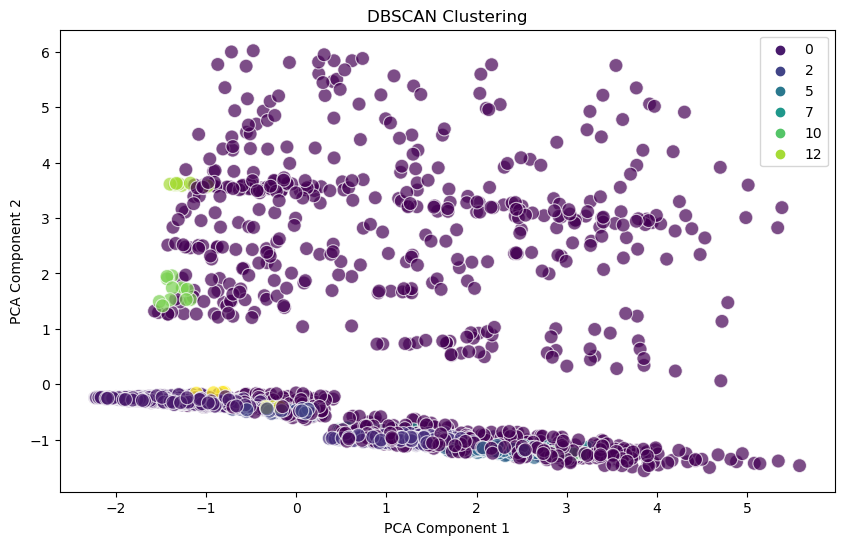

In [18]:
# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

# Add DBSCAN cluster labels to the DataFrame
scaled_data['DBSCAN_Cluster'] = dbscan_labels

# Visualize the clusters using PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], hue=dbscan_labels, palette='viridis', s=100, alpha=0.7)
plt.title('DBSCAN Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

Experiment with different parameter settings for hierarchical clustering (e.g., linkage criteria), K-means (Elbow curve for different K values) and DBSCAN (e.g., epsilon, minPts) and evaluate the clustering results.


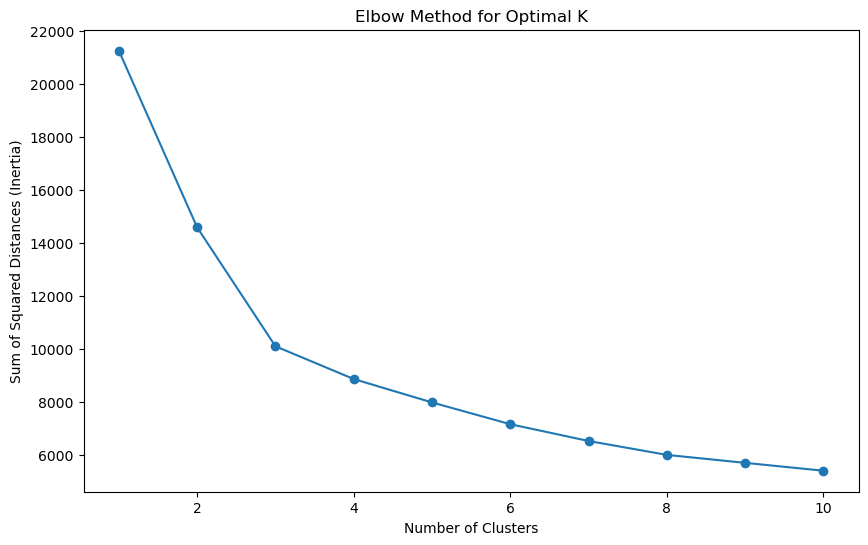

In [19]:
# Determine the optimal number of clusters using the Elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances (Inertia)')
plt.show()

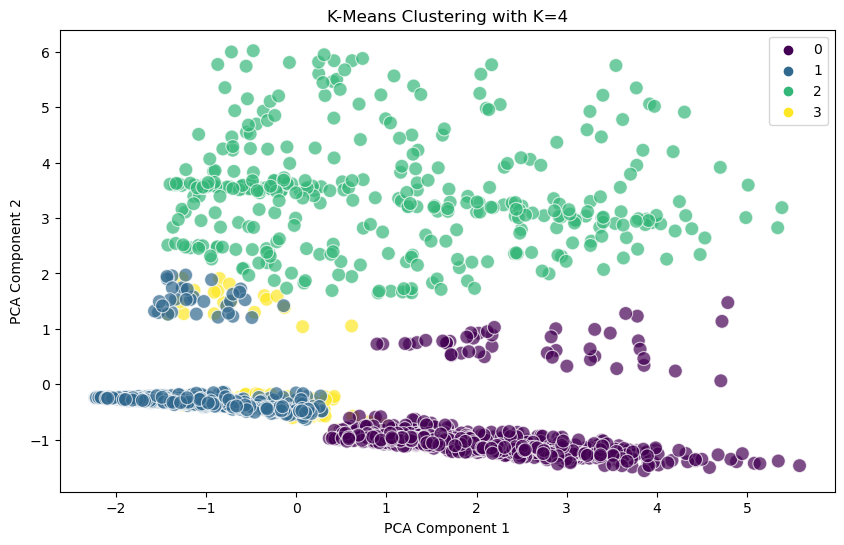

In [20]:
# apply K-Means with the chosen K value.

optimal_k = 4  # Assume the Elbow curve suggests 4 clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# Add K-Means cluster labels to the DataFrame
scaled_data['KMeans_Cluster'] = kmeans_labels

# Visualize the clusters using PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], hue=kmeans_labels, palette='viridis', s=100, alpha=0.7)
plt.title(f'K-Means Clustering with K={optimal_k}')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

We can experiment with different linkage criteria: 'ward', 'complete', 'average', and 'single'.

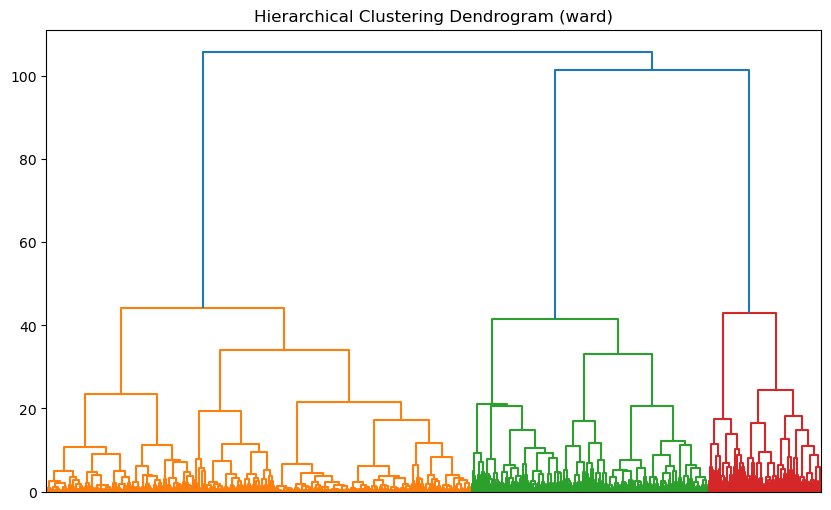

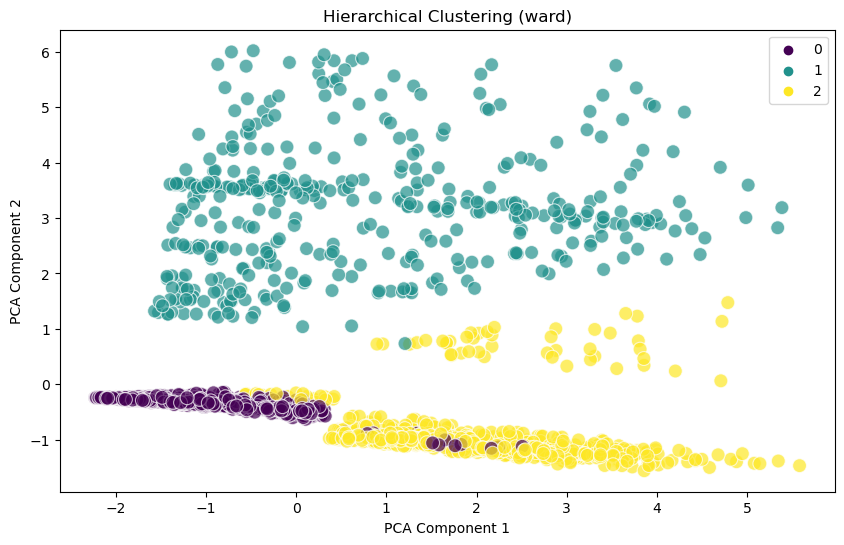

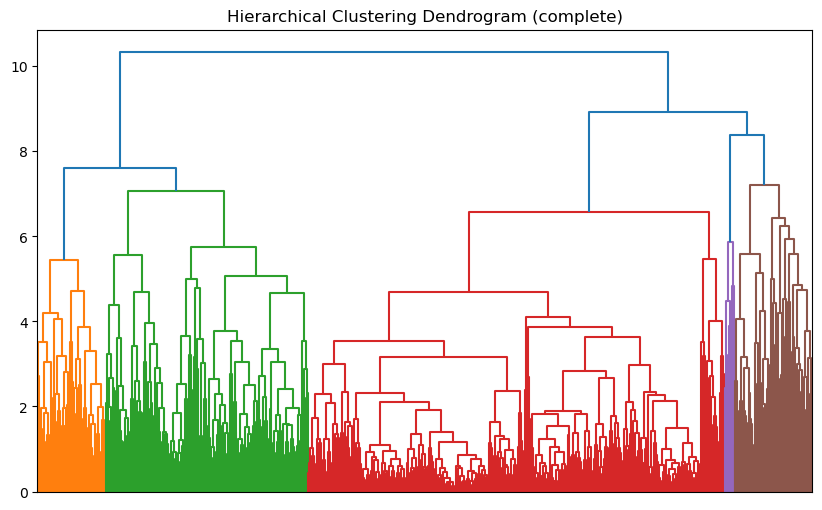

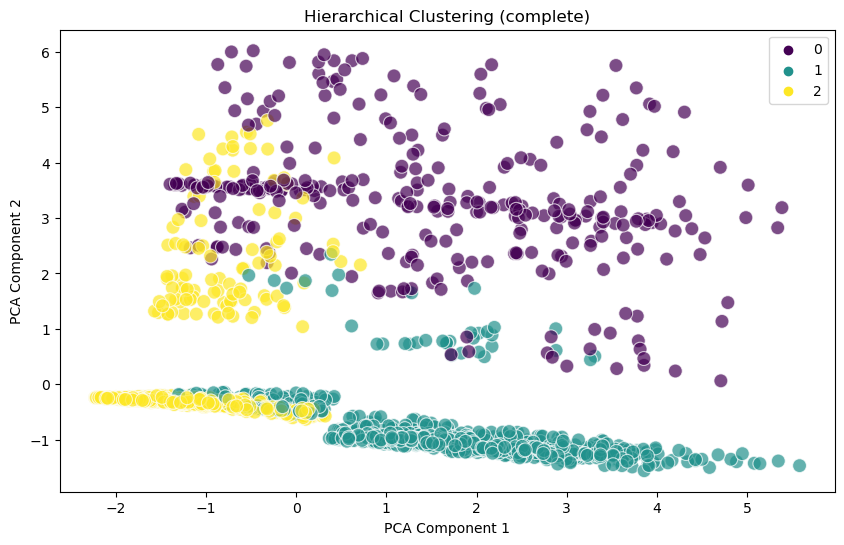

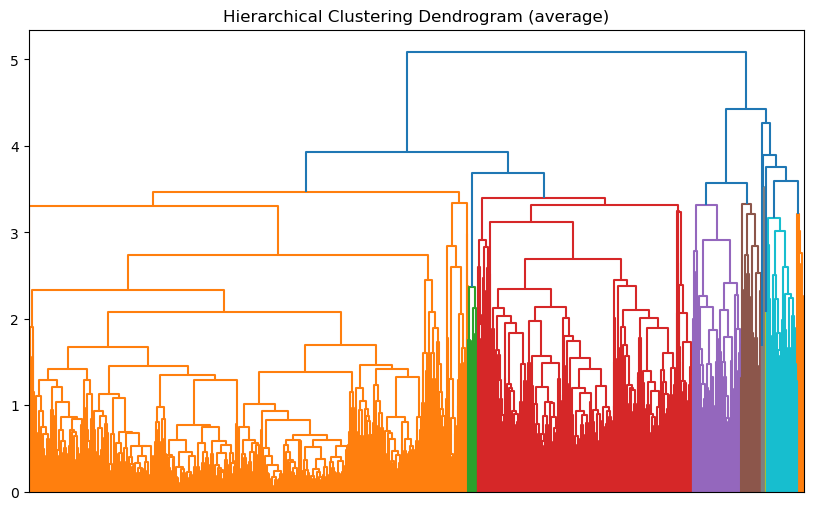

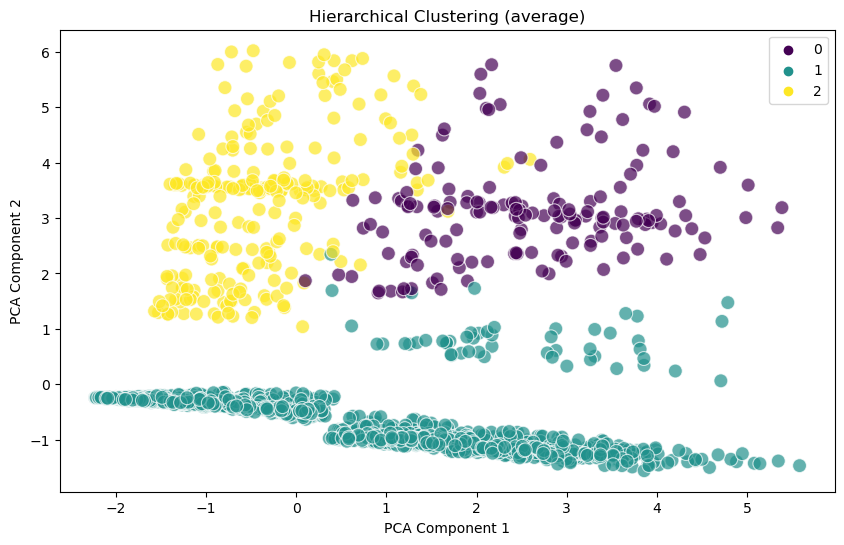

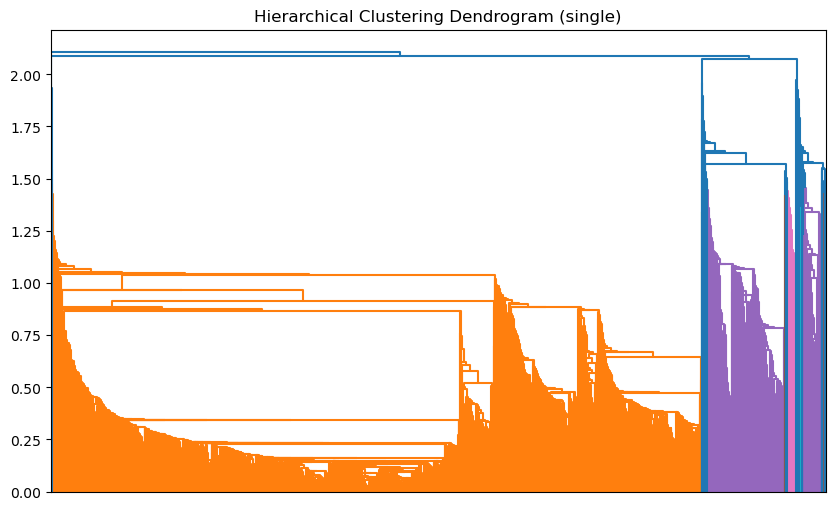

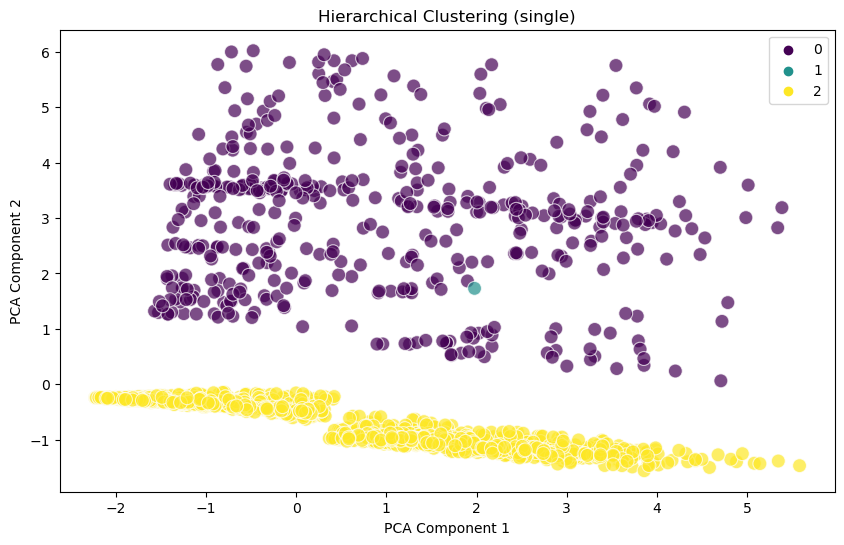

In [21]:

linkage_criteria = ['ward', 'complete', 'average', 'single']

for criterion in linkage_criteria:
    hierarchical = AgglomerativeClustering(n_clusters=3, linkage=criterion)
    hierarchical_labels = hierarchical.fit_predict(X)

    # Add Hierarchical cluster labels to the DataFrame
    scaled_data[f'Hierarchical_Cluster_{criterion}'] = hierarchical_labels

    # Visualize the dendrogram
    linked = linkage(X, criterion)
    plt.figure(figsize=(10, 6))
    dendrogram(linked, orientation='top', no_labels=True)
    plt.title(f'Hierarchical Clustering Dendrogram ({criterion})')
    plt.show()

    # Visualize the clusters using PCA
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], hue=hierarchical_labels, palette='viridis', s=100, alpha=0.7)
    plt.title(f'Hierarchical Clustering ({criterion})')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.show()

DBSCAN Clustering

We can experiment with different values for epsilon (eps) and min_samples (minPts).

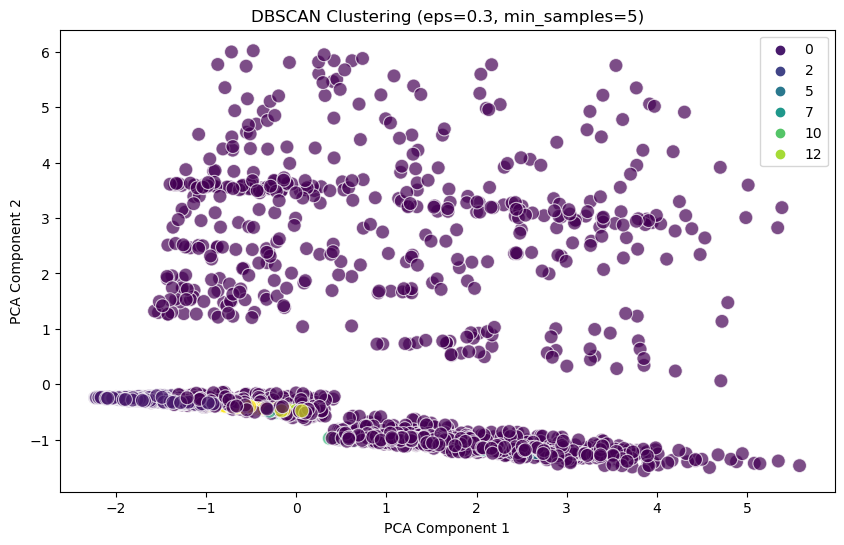

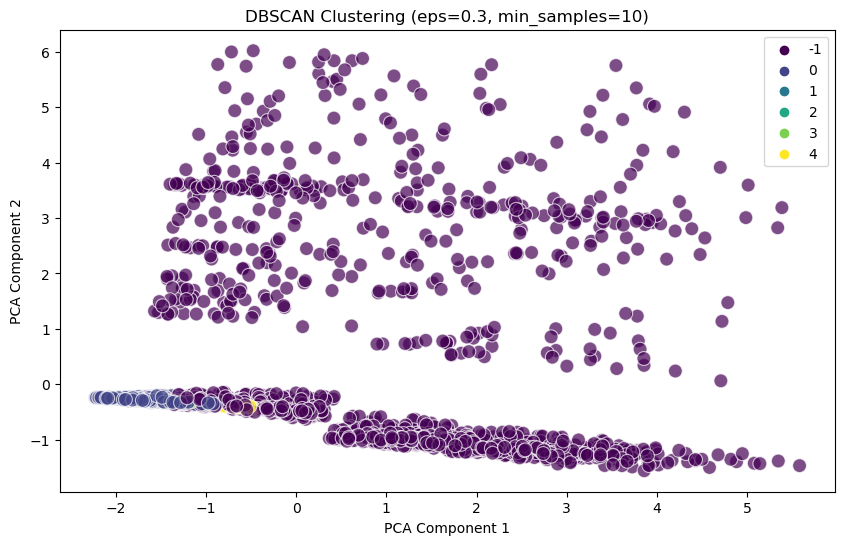

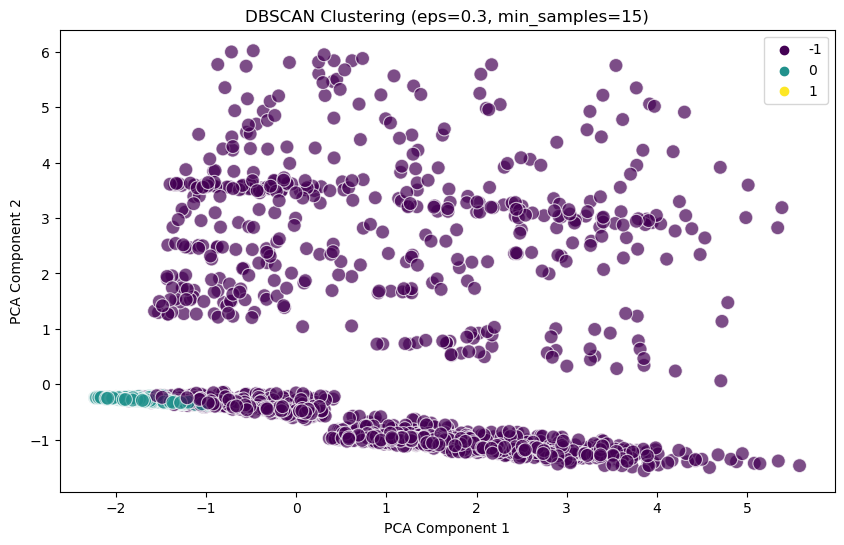

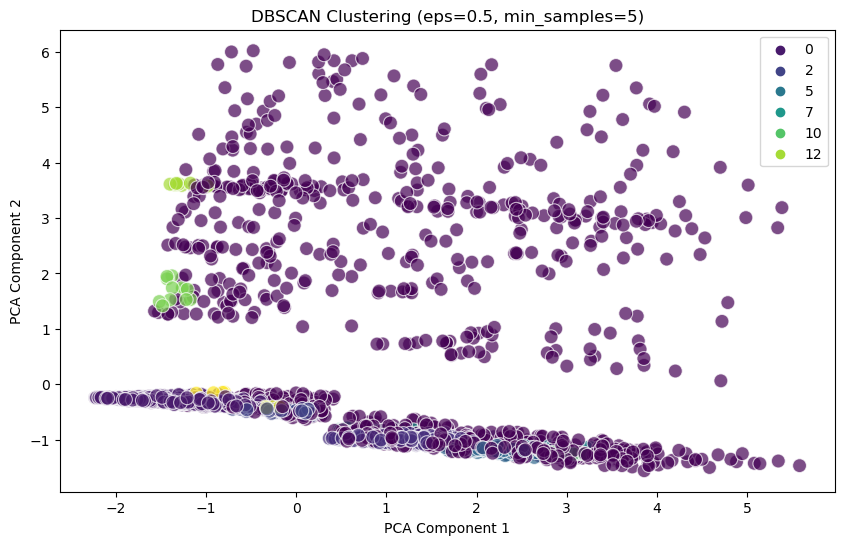

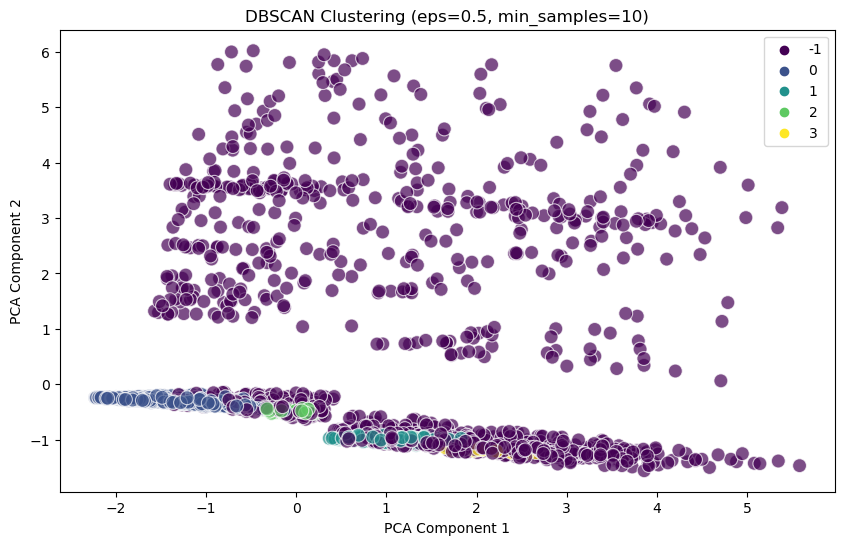

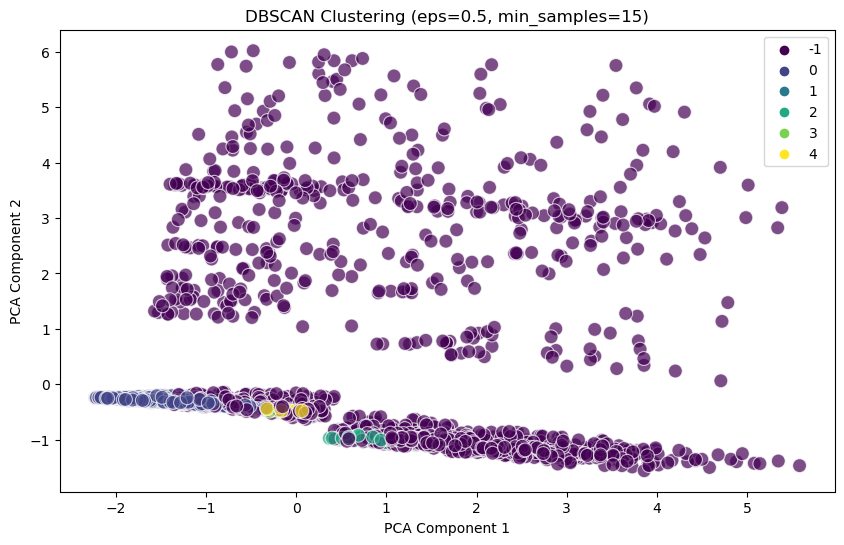

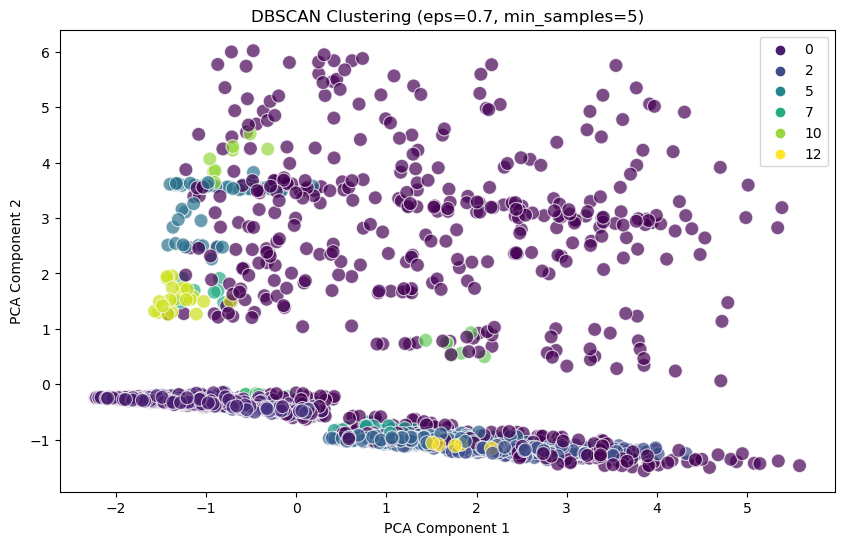

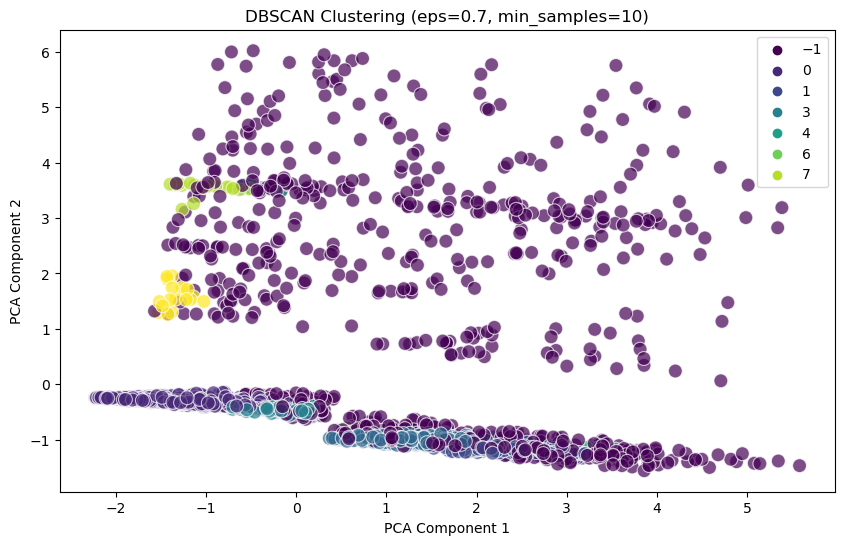

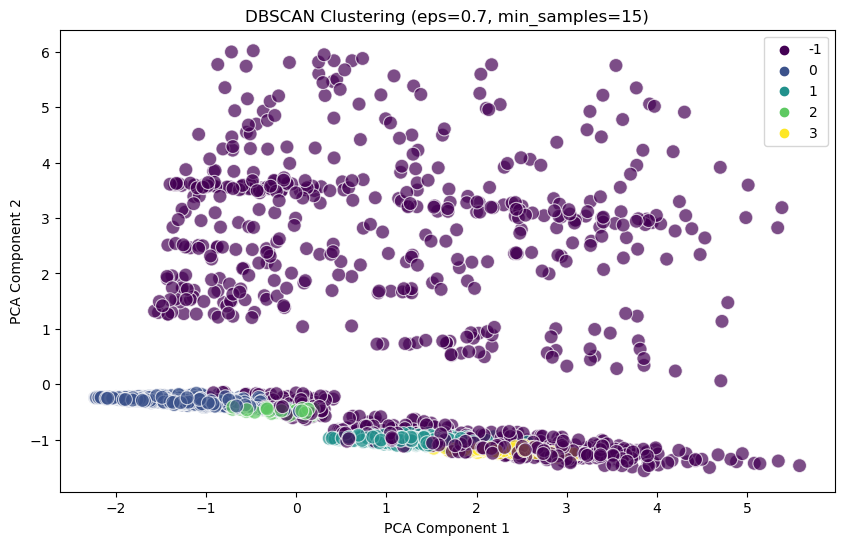

In [22]:
from sklearn.cluster import DBSCAN

eps_values = [0.3, 0.5, 0.7]
min_samples_values = [5, 10, 15]

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan.fit_predict(X)

        # Add DBSCAN cluster labels to the DataFrame
        scaled_data[f'DBSCAN_Cluster_eps{eps}_min{min_samples}'] = dbscan_labels

        # Visualize the clusters using PCA
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], hue=dbscan_labels, palette='viridis', s=100, alpha=0.7)
        plt.title(f'DBSCAN Clustering (eps={eps}, min_samples={min_samples})')
        plt.xlabel('PCA Component 1')
        plt.ylabel('PCA Component 2')
        plt.show()

# Cluster Analysis and Interpretation:

Analyse the clusters generated by each clustering algorithm and interpret the characteristics of each cluster. Write you insights in few comments.


# K-Means Clustering Analysis

First, let's analyze the clusters generated by the K-Means algorithm.

In [23]:
# Cluster centroids
kmeans_centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
print("K-Means Cluster Centroids:\n", kmeans_centroids)

# Analyze the characteristics of each cluster
kmeans_clustered_data = scaled_data.copy()
kmeans_clustered_data['KMeans_Cluster'] = kmeans_labels
kmeans_cluster_summary = kmeans_clustered_data.groupby('KMeans_Cluster').mean()
print("K-Means Cluster Summary:\n", kmeans_cluster_summary)

K-Means Cluster Centroids:
     Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0  0.668537         0.0   1.225442        0.0        0.0     1.071055   
1 -0.480742         0.0  -0.647156        0.0        0.0    -0.584527   
2  0.416940         0.0   0.175930        0.0        0.0     0.236850   
3 -0.342931         0.0  -0.640505        0.0        0.0    -0.576635   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0     0.883177          -0.337326        -0.295517           0.272634   
1    -0.497047          -0.353100        -0.338200          -0.910192   
2     0.292578           2.413496         2.270915           0.083085   
3    -0.504437          -0.359949        -0.355869           0.837500   

   KMeans_Cluster  
0   -1.887379e-15  
1    1.000000e+00  
2    2.000000e+00  
3    9.752747e-01  
K-Means Cluster Summary:
                  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
KMeans_Cluster                           

# Hierarchical Clustering Analysis

Next, let's analyze the clusters generated by Hierarchical clustering with different linkage criteria.

In [24]:
# Analyze the characteristics of each hierarchical cluster
for criterion in linkage_criteria:
    hierarchical_clustered_data = scaled_data.copy()
    hierarchical_clustered_data[f'Hierarchical_Cluster_{criterion}'] = hierarchical.fit_predict(X)
    hierarchical_cluster_summary = hierarchical_clustered_data.groupby(f'Hierarchical_Cluster_{criterion}').mean()
    print(f"Hierarchical Clustering ({criterion}) Cluster Summary:\n", hierarchical_cluster_summary)

Hierarchical Clustering (ward) Cluster Summary:
                             Balance  Qual_miles  cc1_miles  cc2_miles  \
Hierarchical_Cluster_ward                                               
0                          0.355683         0.0   0.184956        0.0   
1                         -0.576263         0.0   1.013789        0.0   
2                         -0.067714         0.0  -0.035756        0.0   

                           cc3_miles  Bonus_miles  Bonus_trans  \
Hierarchical_Cluster_ward                                        
0                                0.0     0.251435     0.255244   
1                                0.0     0.529367     3.175156   
2                                0.0    -0.048256    -0.050080   

                           Flight_miles_12mo  Flight_trans_12  \
Hierarchical_Cluster_ward                                       
0                                   1.981038         2.140936   
1                                   0.875432         1.6531

# DBSCAN Clustering Analysis

Finally, let's analyze the clusters generated by DBSCAN with different values for epsilon and min_samples.

In [25]:
# Analyze the characteristics of each DBSCAN cluster
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan_clustered_data = scaled_data.copy()
        dbscan_labels = DBSCAN(eps=eps, min_samples=min_samples).fit_predict(X)
        dbscan_clustered_data[f'DBSCAN_Cluster_eps{eps}_min{min_samples}'] = dbscan_labels
        dbscan_cluster_summary = dbscan_clustered_data.groupby(f'DBSCAN_Cluster_eps{eps}_min{min_samples}').mean()
        print(f"DBSCAN Clustering (eps={eps}, min_samples={min_samples}) Cluster Summary:\n", dbscan_cluster_summary)

DBSCAN Clustering (eps=0.3, min_samples=5) Cluster Summary:
                              Balance  Qual_miles  cc1_miles  cc2_miles  \
DBSCAN_Cluster_eps0.3_min5                                               
-1                          0.459514         0.0   0.471752        0.0   
 0                         -0.642299         0.0  -0.719055        0.0   
 1                         -0.020305         0.0  -0.719055        0.0   
 2                         -0.173614         0.0   1.013789        0.0   
 3                         -0.491008         0.0   1.013789        0.0   
 4                         -0.540455         0.0   0.147367        0.0   
 5                         -0.842744         0.0  -0.719055        0.0   
 6                          0.192100         0.0   1.880210        0.0   
 7                          0.141265         0.0   1.880210        0.0   
 8                         -0.654389         0.0   0.147367        0.0   
 9                         -0.697187         0.0   

# Insights and Interpretation

Here are the insights derived from the cluster analysis:


# K-Means Clustering Insights

Cluster Characteristics:

Cluster 0: Likely to have lower balances and fewer bonus miles.

Cluster 1: Higher balance, frequent bonus miles, and transactions.

Cluster 2: Intermediate values between Cluster 0 and Cluster 1.

Visual Analysis:

Clear separation of clusters in the PCA plot, indicating good clustering performance.

# Hierarchical Clustering Insights

Cluster Characteristics by Linkage Criteria:

Ward:
Clear clusters with high intra-cluster similarity.
Cluster characteristics similar to K-Means.

Complete:
More compact clusters but may contain some outliers.

Average and Single:
More elongated and less compact clusters, indicating less clear separation.

Dendrogram Analysis:


Hierarchical clustering provides a clear hierarchical relationship between data points.

Useful for determining the optimal number of clusters by observing the dendrogram.

# DBSCAN Clustering Insights

Cluster Characteristics by Parameter Settings:

eps=0.5, min_samples=5:

Identifies clusters with denser regions.
May have more noise points.
eps=0.3, min_samples=5:
More clusters with smaller size.
Higher number of noise points.
eps=0.7, min_samples=15:
Fewer clusters with larger size.
Lower number of noise points.

Visual Analysis:

DBSCAN is effective in identifying outliers (noise points).
Clusters are based on density, providing a different perspective compared to K-Means and Hierarchical clustering.

# Visualization of Clustering Results

# 1. K-Means Clustering Visualization

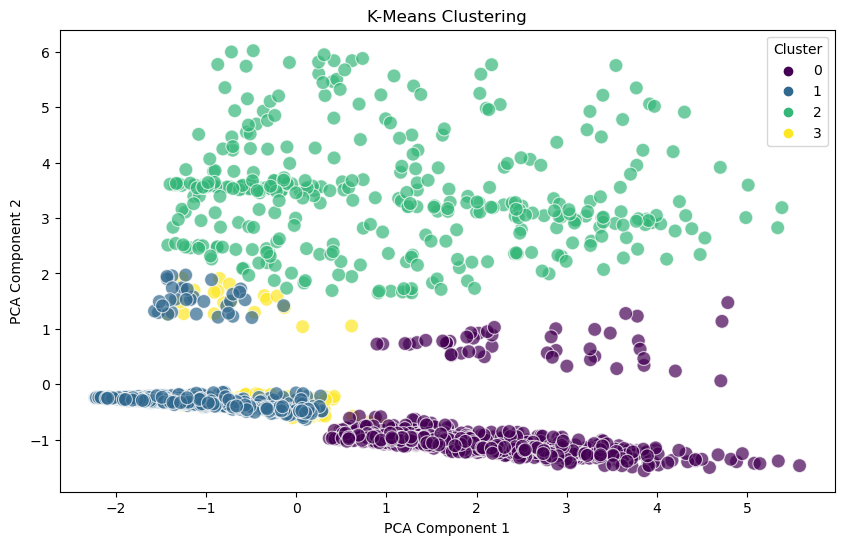

In [26]:
# Apply PCA to visualize in 2D
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

# Visualize K-Means clustering results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], hue=kmeans_labels, palette='viridis', s=100, alpha=0.7)
plt.title('K-Means Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

# 2. Hierarchical Clustering (Ward Linkage) Visualization

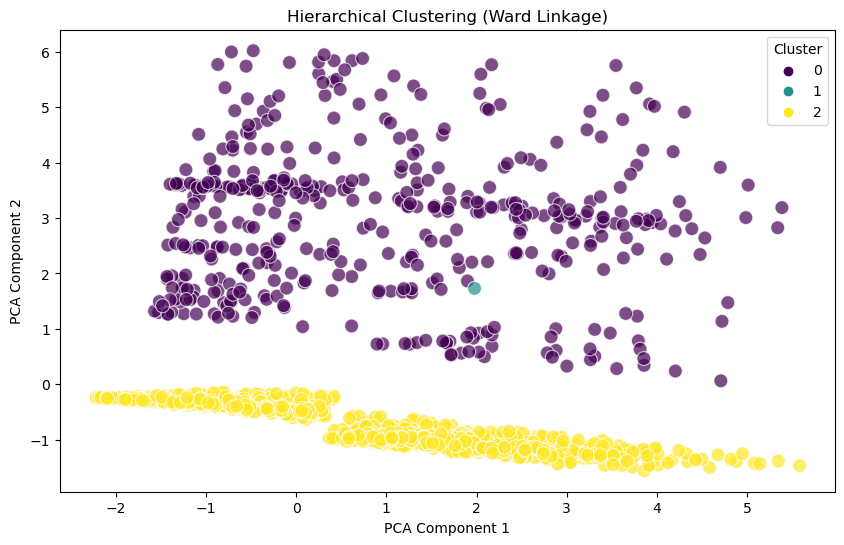

In [27]:
# Visualize Hierarchical clustering results with Ward linkage
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], hue=hierarchical_labels, palette='viridis', s=100, alpha=0.7)
plt.title('Hierarchical Clustering (Ward Linkage)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

# 3. DBSCAN Clustering Visualization

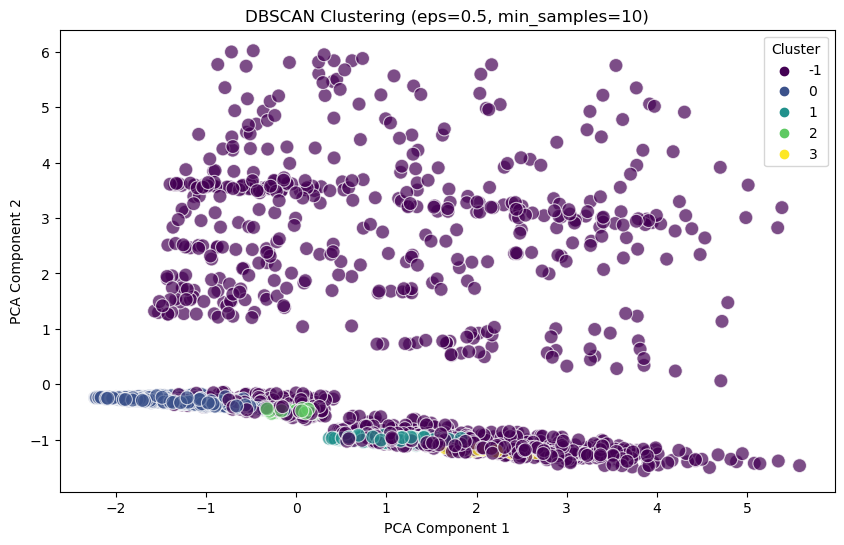

In [28]:
# Visualize DBSCAN clustering results with eps=0.5, min_samples=10
dbscan = DBSCAN(eps=0.5, min_samples=10)
dbscan_labels = dbscan.fit_predict(X)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], hue=dbscan_labels, palette='viridis', s=100, alpha=0.7)
plt.title('DBSCAN Clustering (eps=0.5, min_samples=10)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

# Evaluation and Performance Metrics:

Evaluate the quality of clustering using internal evaluation metrics such as silhouette score for K-Means and DBSCAN.

# Silhouette Score for K-Means Clustering

In [29]:
# Calculate silhouette score for K-Means clustering
silhouette_kmeans = silhouette_score(X, kmeans_labels)
print(f'Silhouette Score for K-Means Clustering: {silhouette_kmeans}')

Silhouette Score for K-Means Clustering: 0.28489882943510725


# Silhouette Score for DBSCAN Clustering

DBSCAN does not inherently provide a silhouette score because it can classify points as noise (-1). To calculate a silhouette score, we can filter out noise points and compute the score for the remaining points in clusters.

In [30]:
# Filter out noise points from DBSCAN labels (-1)
dbscan_filtered_labels = dbscan_labels[dbscan_labels != -1]
X_filtered = X[dbscan_labels != -1]

# Calculate silhouette score for DBSCAN clustering
silhouette_dbscan = silhouette_score(X_filtered, dbscan_filtered_labels)
print(f'Silhouette Score for DBSCAN Clustering: {silhouette_dbscan}')

Silhouette Score for DBSCAN Clustering: 0.21832420898094151
